In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../data/train.csv')

df['datetime'] = pd.to_datetime(df['datetime'])
df['hour'] = df['datetime'].dt.hour
df['dayofweek'] = df['datetime'].dt.dayofweek
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year

df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,dayofweek,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,5,1,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,1,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,5,1,2011


In [2]:
# chek raws with 0 and 1 values as well as total
print(df['count'].count())
print((df['count'] == 1).sum())
print((df['count'] == 0).sum())
print((df['count']).sum())


10886
105
0
2085476


### Create Split

In [3]:
from sklearn.model_selection import train_test_split

# exclude casual andregistered, as leakage of data -> not available at time of prediction
X = df[['hour', 'dayofweek', 'month', 'year', 'season', 'holiday', 'workingday', 'weather', 'temp', 'humidity', 'windspeed']]
y = df['count']

Xtrain, Xval, ytrain, yval= train_test_split(X,y, test_size=.20, random_state=30, shuffle=True) # check woith Xtrain and ytrain

df_train = pd.concat([Xtrain,ytrain], axis=1) # check with df_train.head() and df_train.shape
df_train.to_csv("bicycle_eda_data.csv")

### Exploratory Data Analysis

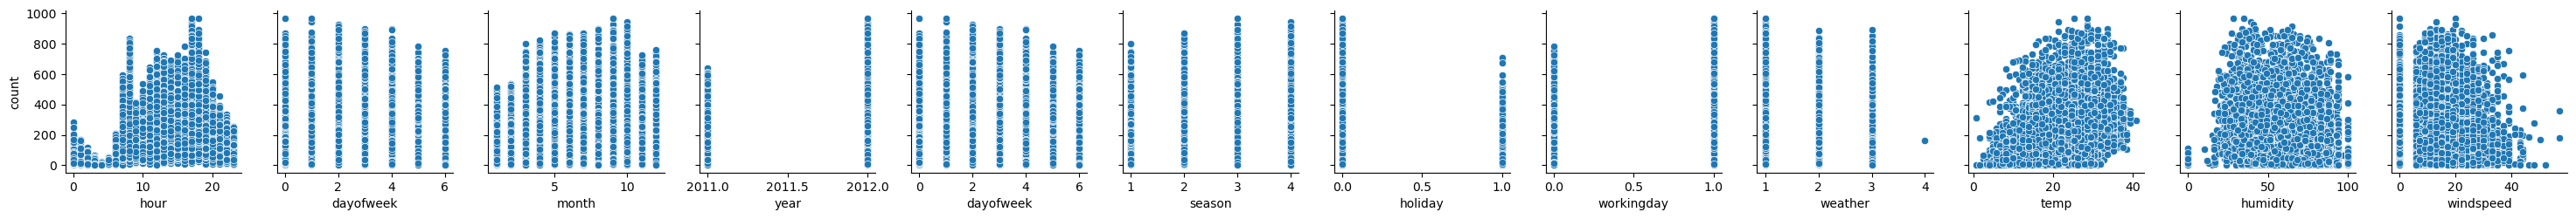

In [4]:
sns.pairplot(df_train, x_vars=['hour', 'dayofweek', 'month', 'year', 'dayofweek', 'season', 'holiday', 'workingday', 'weather', 'temp', 'humidity', 'windspeed'], 
             y_vars='count')
plt.show()

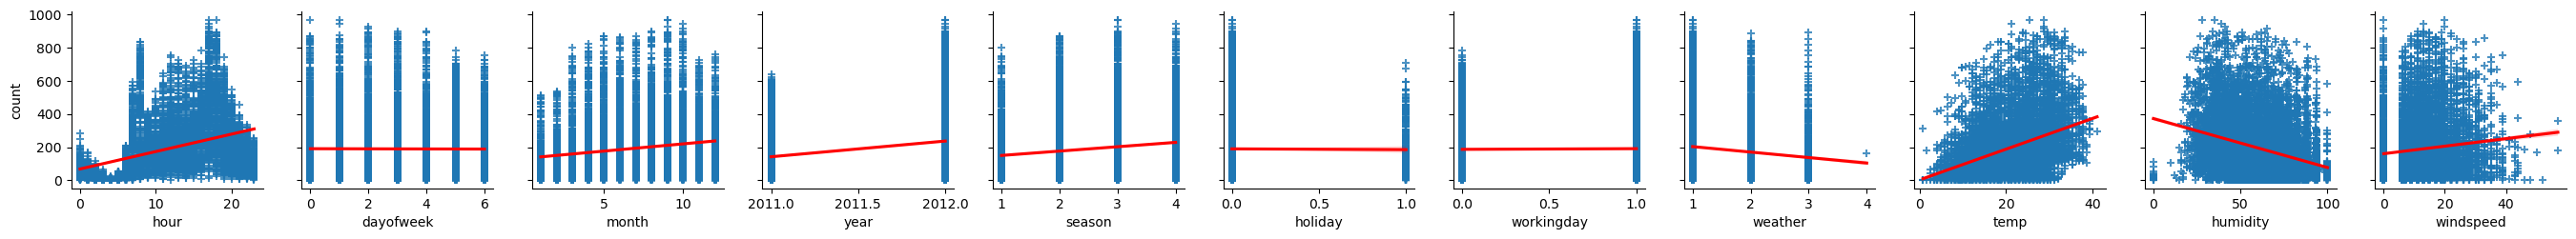

In [5]:
# add the regression line
sns.pairplot(df_train, x_vars=['hour', 'dayofweek', 'month', 'year', 'season', 'holiday', 'workingday', 'weather', 'temp', 'humidity', 'windspeed']
             ,y_vars='count', diag_kind='hist', kind='reg', markers='+',
              plot_kws={'line_kws':{'color':'red'}},
              diag_kws={'bins': 50, 'histtype': 'step', 'linewidth': 3},)
plt.show()

(array([-5.,  0.,  5., 10., 15., 20., 25.]),
 [Text(-5.0, 0, '−5'),
  Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25')])

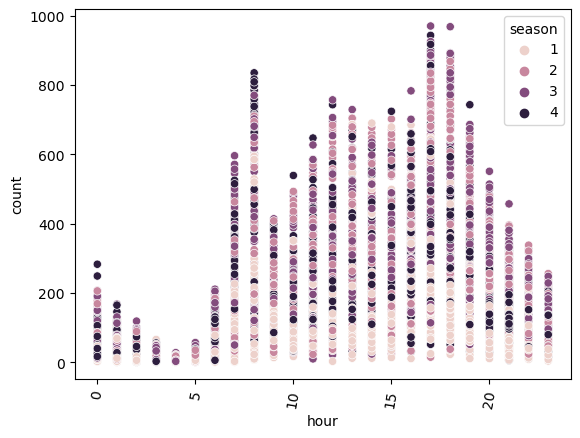

In [6]:
sns.scatterplot(data=df_train[df_train["count"]>0], x="hour", y="count", hue="season") # add different x to analyse
plt.xticks(rotation=80)

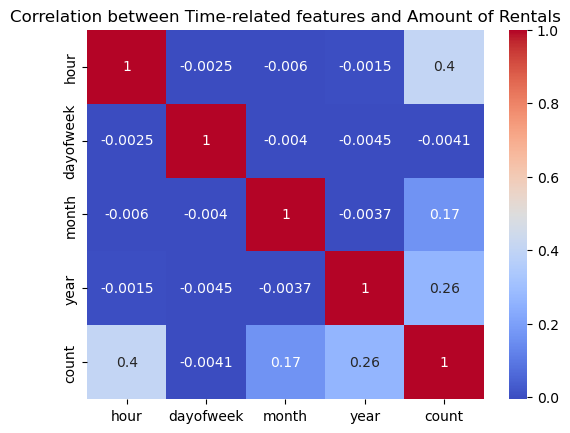

In [7]:
time_features = ['hour', 'dayofweek', 'month', 'year']
corr = df_train[time_features+['count']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation between Time-related features and Amount of Rentals')
plt.show()

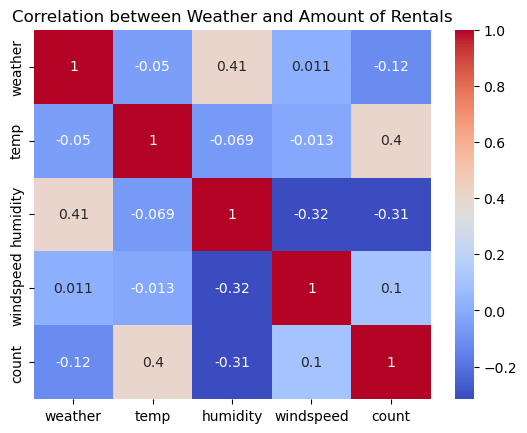

In [8]:
weather_features = ['weather', 'temp', 'humidity', 'windspeed']
corr = df_train[weather_features+['count']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation between Weather and Amount of Rentals')
plt.show()

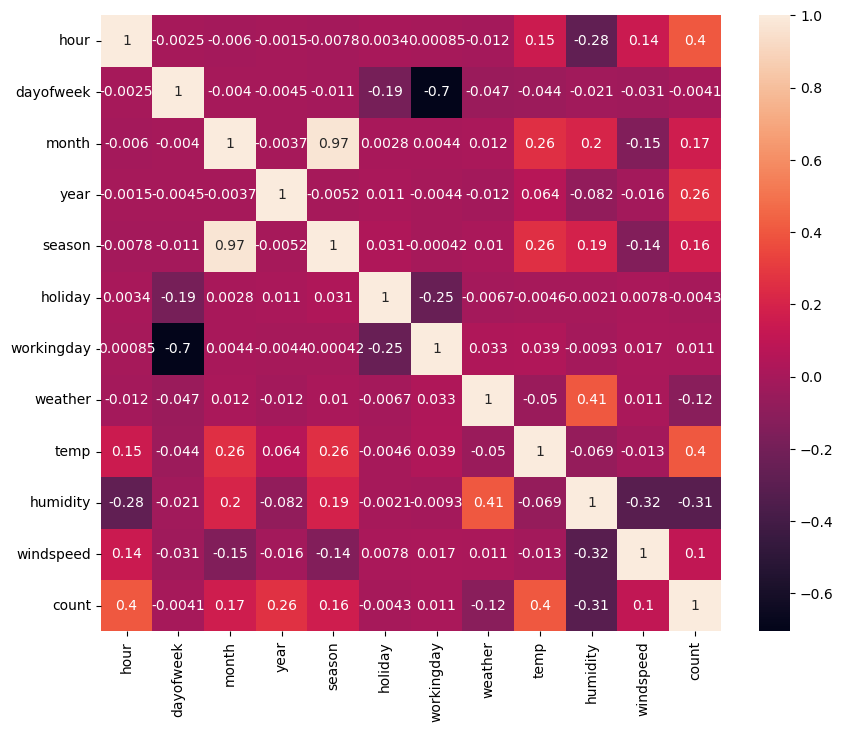

In [15]:
corr = df_train.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True)
plt.show()

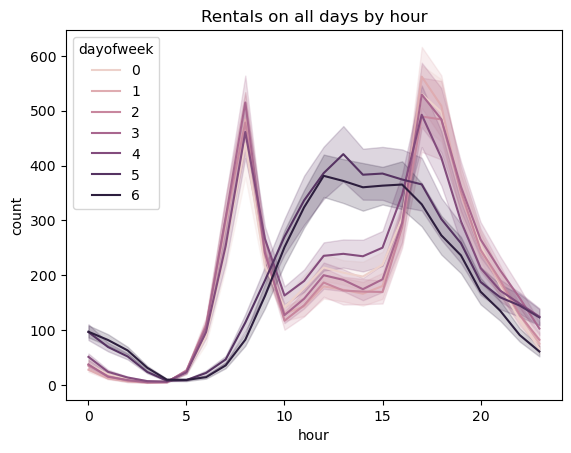

In [10]:
days_of_week = [0,1,2,3,4,5,6]
all_days_data = pd.DataFrame()
for day in days_of_week:
    data = df_train.loc[df_train['dayofweek'] == day]
    all_days_data = pd.concat([all_days_data, data])
sns.lineplot(x='hour', y='count', hue='dayofweek', data=all_days_data)
plt.title(f'Rentals on all days by hour')
plt.show()

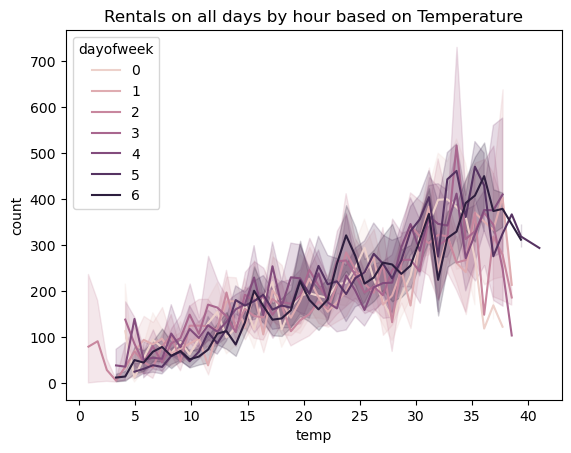

In [11]:
all_days_data = pd.DataFrame()
for day in days_of_week:
    data = df_train.loc[df_train['dayofweek'] == day]
    all_days_data = pd.concat([all_days_data, data])
sns.lineplot(x='temp', y='count', hue='dayofweek', data=all_days_data)
plt.title(f'Rentals on all days by hour based on Temperature')
plt.show()

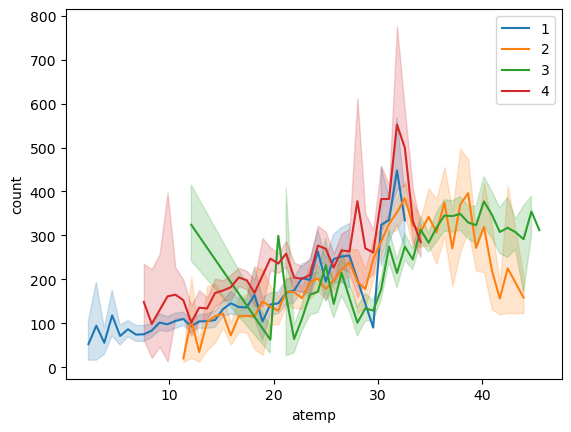

In [12]:
for season in df['season'].unique():
    sns.lineplot(data = df[(df["count"]>10) & (df["season"] == season)], x = "atemp", y = "count", label=season)